<a href="https://colab.research.google.com/github/chinmay002/NLP/blob/main/Question_Answer_chapter_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install datasets

In [3]:


!pip install transformers

!pip install farm-haystack
!pip install farm-haystack[elasticsearch]
!pip install farm-haystack[inference]
#!pip install farm-haystack[all]
!pip install farm-haystack[metrics]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 106.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.7/819.7 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 95.5 MB/s eta 0:00:00
   

In [88]:
from datasets import get_dataset_config_names

In [5]:
domains = get_dataset_config_names('subjqa') #these are the dataset categroeis

In [6]:
domains

['books', 'electronics', 'grocery', 'movies', 'restaurants', 'tripadvisor']

In [7]:
from datasets import load_dataset
subjqa = load_dataset('subjqa',name ='electronics')

Generating train split:   0%|          | 0/1295 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/358 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/255 [00:00<?, ? examples/s]

In [8]:
for a,b in subjqa['train']['answers'][1].items():
  print(a)

text
answer_start
answer_subj_level
ans_subj_score
is_ans_subjective


In [9]:
dfs = {split:dset.to_pandas() for split,dset in subjqa.flatten().items()}

for split ,df in dfs.items():
  print(f"nO of questins {split}: {df['id'].nunique()}")

nO of questins train: 1295
nO of questins test: 358
nO of questins validation: 255


In [10]:
dfs['train']

,domain,nn_mod,nn_asp,query_mod,query_asp,q_reviews_id,question_subj_level,ques_subj_score,is_ques_subjective,review_id,id,title,context,question,answers.text,answers.answer_start,answers.answer_subj_level,answers.ans_subj_score,answers.is_ans_subjective
0,electronics,great,bass response,excellent,bass,0514ee34b672623dff659334a25b599b,5,0.50,False,882b1e2745a4779c8f17b3d4406b91c7,2543d296da9766d8d17d040ecc781699,B00001P4ZH,"I have had Koss headphones in the past, Pro 4A...",How is the bass?,[],[],[],[],[]
1,electronics,harsh,high,not strong,bass,7c46670208f7bf5497480fbdbb44561a,1,0.50,False,ce76793f036494eabe07b33a9a67288a,d476830bf9282e2b9033e2bb44bbb995,B00001P4ZH,To anyone who hasn't tried all the various typ...,Is this music song have a goo bass?,"[Bass is weak as expected, Bass is weak as exp...","[1302, 1302]","[1, 1]","[0.5083333, 0.5083333]","[True, True]"
2,electronics,neutral,sound,present,bass,8fbf26792c438aa83178c2d507af5d77,1,0.50,False,d040f2713caa2aff0ce95affb40e12c2,455575557886d6dfeea5aa19577e5de4,B00001P4ZH,I have had many sub-$100 headphones from $5 Pa...,How is the bass?,[The only fault in the sound is the bass],[650],[2],[0.6333333],[True]
3,electronics,muddy,bass,awesome,bass,9876fd06ed8f075fcad70d1e30e7e8be,1,0.50,False,043e7162df91f6ea916c790c8a6f6b22,6895a59b470d8feee0f39da6c53a92e5,B00001WRSJ,My sister's Bose headphones finally died and s...,How is the audio bass?,[the best of all of them],[1609],[1],[0.3],[False]
4,electronics,perfect,bass,incredible,sound,16506b53e2d4c2b6a65881d9462256c2,1,0.65,True,29ccd7e690050e2951be49289e915382,7a2173c502da97c5bd5950eae7cd7430,B00001WRSJ,Wow. Just wow. I'm a 22 yr old with a crazy ob...,Why do I have an incredible sound?,"[The sound is so crisp, crazy obsession with s...","[141, 38]","[1, 1]","[0.40833333, 0.40833333]","[False, False]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,electronics,great,impression,rubbery,feel,d4409d6272a7d1d5aa287d6e164bb7d0,1,0.00,False,ebaaec25661c0b21f3e5600a1ed7e30b,e0ea72e711324b5482ec1b36a48f16ee,B00H3OYSHW,I ordered my new NewTrend Airbender Pro NT610K...,Where can I feel my device?,[],[],[],[],[]
1291,electronics,tight,case,great,protection,ed6533390fe2fe0d546b69dea570c34b,5,0.00,False,ebaaec25661c0b21f3e5600a1ed7e30b,ee5906ed3306b7c6d219a40adae2c7c2,B00H3OYSHW,I ordered my new NewTrend Airbender Pro NT610K...,How does the selector protection me?,[],[],[],[],[]
1292,electronics,good,texture,good,grip,22b23446daf9d5bc0140be7278b220ee,1,0.00,False,84efbd9643d7f43af0ea0d2468c7dcc9,a541ffd9697ebf0ad9d226428594128e,B00HNGB1YS,"After using this case for a few days, I have g...",How is the grip?,[],[],[],[],[]
1293,electronics,easy to use,keyboard,removable,keyboard,e7967ad5be0658b4acfca1118f6af1ab,1,0.00,False,e856d7e5351e3385b5d75f06562e905b,7efc5e7ffaa79f53cc50f76a44f9f88e,B00HPM1G8Q,Edit 4/21/14. I finally caved and purchased a ...,How is the keyboard?,"[the keyboard is very easy to use, the keyboar...","[258, 258]","[1, 1]","[1.0, 1.0]","[True, True]"


In [11]:
qa_cols = ["title", "question", "answers.text","answers.answer_start", "context"]
sample_df = dfs["train"][qa_cols].sample(2, random_state=7)
sample_df

,title,question,answers.text,answers.answer_start,context
791,B005DKZTMG,Does the keyboard lightweight?,[this keyboard is compact],[215],I really like this keyboard. I give it 4 star...
1159,B00AAIPT76,How is the battery?,[],[],I bought this after the first spare gopro batt...


In [12]:
start_idx = sample_df['answers.answer_start'].iloc[0][0]
end_idx = start_idx +len(sample_df['answers.text'].iloc[0][0])

sample_df['context'].iloc[0][start_idx : end_idx]

'this keyboard is compact'

In [13]:
counts ={}
question_types = ['What',"How","Is",'Does','Do','Was','Where','Why']

for q in question_types:
  counts[q] = dfs['train']['question'].str.startswith(q).value_counts()[True]

<Axes: >

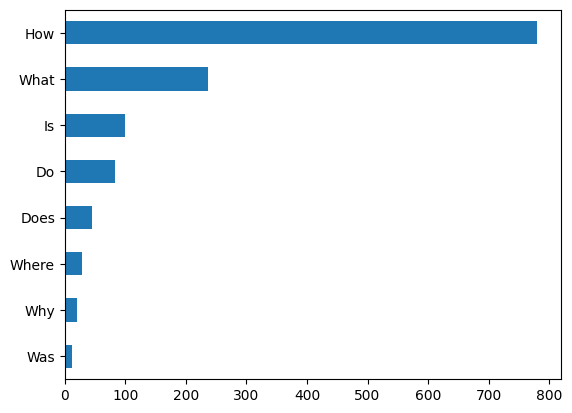

In [14]:
import pandas as pd
import numpy as np

pd.Series(counts).sort_values().plot.barh()

In [15]:
question_types = ['What',"How","Is"]
for q_t in question_types:
  for question in dfs['train'][dfs['train']['question'].str.startswith(q_t)].sample(n=3,random_state=43)['question']:
    print(question)

What do you think about pocket?
What do you think about grip?
What happens to the ports if you plug it in?
How is the ability?
How many products have been stolen?
How about the specs?
Is quality good?
Is the focus ring smooth?
Is this device compatible?


In [16]:
#Extracting answers from the text

#example : is this watch waterproof; and review says its waterproof at30m depth, then model should output waterproof at 30m


#to do this
'''
1> Frame the supervised task
2> Tokenize and encode QA tasks
3> Deal with long passages that exceeds modls maximum context size

'''

'\n1> Frame the supervised task\n2> Tokenize and encode QA tasks\n3> Deal with long passages that exceeds modls maximum context size\n\n'

In [17]:
#MOst common way to extract answers from text is to build span classification task ,where start and end tokens of answer span act as the
#lables that model has to predict since we have samll data  we take the already trained model that was trained on SQuAD with same numbr of classes


#Span CLassification
Tokenize  text for QA

In [18]:
from transformers import AutoTokenizer

In [19]:
model_ckpt = "deepset/minilm-uncased-squad2"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)



In [20]:
question = "How much music can this hold?"
context = """An MP3 is about 1 MB/minute, so about 6000 hours depending on file size."""
tokenizer(question,context,return_tensors = 'pt')

#token_type_ids = 0 for question and 1 for context

{'input_ids': tensor([[  101,  2129,  2172,  2189,  2064,  2023,  2907,  1029,   102,  2019,
         23378,  2003,  2055,  1015, 16914,  1013,  3371,  1010,  2061,  2055,
         25961,  2847,  5834,  2006,  5371,  2946,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1]])}

In [21]:
inputs = tokenizer(question,context,return_tensors = 'pt')
tokenizer.decode(inputs['input_ids'][0])

'[CLS] how much music can this hold? [SEP] an mp3 is about 1 mb / minute, so about 6000 hours depending on file size. [SEP]'

In [22]:
import torch
from transformers import AutoModelForQuestionAnswering

model= AutoModelForQuestionAnswering.from_pretrained(model_ckpt)

with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

Some weights of the model checkpoint at deepset/minilm-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[-0.9862, -4.7750, -5.4025, -5.2378, -5.2863, -5.5117, -4.9819, -6.1880,
         -0.9862,  0.2596, -0.2144, -1.7136,  3.7806,  4.8561, -1.0546, -3.9097,
         -1.7374, -4.5944, -1.4278,  3.9949,  5.0391, -0.2018, -3.0193, -4.8549,
         -2.3107, -3.5110, -3.5713, -0.9862]]), end_logits=tensor([[-0.9623, -5.4733, -5.0326, -5.1639, -5.4278, -5.5151, -5.1749, -4.6233,
         -0.9623, -3.7855, -0.8715, -3.7745, -3.0161, -1.1780,  0.1758, -2.7365,
          4.8934,  0.3046, -3.1761, -3.2762,  0.8937,  5.6606, -0.3623, -4.9554,
         -3.2531, -0.0914,  1.6211, -0.9623]]), hidden_states=None, attentions=None)


In [23]:
start_logits = outputs.start_logits
end_logits = outputs.end_logits

print(f"INputs SHape {inputs.input_ids.size()}")
print(f"starts logits shape {start_logits.size()}")
print(f"end logits shape {end_logits.size()}")


#start and end tokens are selected having high score.

INputs SHape torch.Size([1, 28])
starts logits shape torch.Size([1, 28])
end logits shape torch.Size([1, 28])


In [24]:

start_idx = torch.argmax(start_logits) #6000
end_idx = torch.argmax(end_logits) + 1 #+1 to include next token while subsetting
answer_span = inputs["input_ids"][0][start_idx:end_idx]
answer = tokenizer.decode(answer_span)
print(f"Question: {question}")
print(f"Answer: {answer}")

Question: How much music can this hold?
Answer: 6000 hours


In [25]:
from transformers import pipeline
pipe = pipeline('question-answering',model =model, tokenizer = tokenizer)
pipe(question=question, context=context, topk=3)
#score is softmax over logits, topK -model can predict multiple answers

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/question_answering.py:326: UserWarning: topk parameter is deprecated, use top_k instead
  warnings.warn("topk parameter is deprecated, use top_k instead", UserWarning)


[{'score': 0.2651609182357788, 'start': 38, 'end': 48, 'answer': '6000 hours'},
 {'score': 0.22082965075969696,
  'start': 16,
  'end': 48,
  'answer': '1 MB/minute, so about 6000 hours'},
 {'score': 0.10253587365150452,
  'start': 16,
  'end': 27,
  'answer': '1 MB/minute'}]

#USing HAYSTACK to Build a QA pipeline

In [26]:
#we provide both question and context, however in real time, user porivde only question. We need to get relevant stored conetxt among all other reviews.
#one way is to get concant all reviews , but drawback here is context will be huge/long and latency is introduced
#example each porudct has 30 reviw and each review take 100 millsec to process, to process all 30 reviews it would take 3 sec latency , not good for ec0mmerce


#To Hnadle mordern QA , retriver-reader model is used.
#retriver = categorized as sparse or Dense. Sparse use tfidf to represnt each doc and quesry as sparse vector.inner prodcut between quesry and doc is calculated to get relvant conetxt
#Dense retriver use encoder to represnt query and doc as contextulized embeddings.

#Reader
#responsible for extracting an answer from document from the documents provide by retriveer

In [27]:
'''
Document store
A document-oriented database that stores documents and metadata which are provided to the retriever at query time
we’ll use the
ElasticsearchDocumentStore, which is compatible with both retriever types. Elasticsearch is a search
engine that is capable of handling a diverse range of data types, including textual, numerical, geospatial,
structured, and unstructured. Its ability to store huge volumes of data and quickly filter it with full-text search
features makes it especially well suited for developing QA systems.
'''

'\nDocument store\nA document-oriented database that stores documents and metadata which are provided to the retriever at query time\nwe’ll use the\nElasticsearchDocumentStore, which is compatible with both retriever types. Elasticsearch is a search\nengine that is capable of handling a diverse range of data types, including textual, numerical, geospatial,\nstructured, and unstructured. Its ability to store huge volumes of data and quickly filter it with full-text search\nfeatures makes it especially well suited for developing QA systems.\n'

##initlaize a doc store


In [28]:
url = """https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-7.9.2-linux-x86_64.tar.gz"""
!wget -nc -q {url}
!tar -xzf elasticsearch-7.9.2-linux-x86_64.tar.gz


In [29]:
# Run Elasticsearch as a background process

import os
from subprocess import Popen, PIPE, STDOUT

!chown -R daemon:daemon elasticsearch-7.9.2
es_server = Popen(args=['elasticsearch-7.9.2/bin/elasticsearch'],
                  stdout=PIPE, stderr=STDOUT, preexec_fn=lambda: os.setuid(1))
# Wait until Elasticsearch has started
!sleep 30

In [30]:

!curl -X GET "localhost:9200/?pretty"

{
  "name" : "7d7aee49d217",
  "cluster_name" : "elasticsearch",
  "cluster_uuid" : "jp0Dimg1TUep5R6YG8OqKA",
  "version" : {
    "number" : "7.9.2",
    "build_flavor" : "default",
    "build_type" : "tar",
    "build_hash" : "d34da0ea4a966c4e49417f2da2f244e3e97b4e6e",
    "build_date" : "2020-09-23T00:45:33.626720Z",
    "build_snapshot" : false,
    "lucene_version" : "8.6.2",
    "minimum_wire_compatibility_version" : "6.8.0",
    "minimum_index_compatibility_version" : "6.0.0-beta1"
  },
  "tagline" : "You Know, for Search"
}


In [31]:
#!pip install --upgrade tensorflow
from haystack.document_stores.elasticsearch import ElasticsearchDocumentStore


In [32]:
document_store = ElasticsearchDocumentStore(return_embedding=True) #expects list of dic with text and meta keys

In [33]:
# It's a good idea to flush Elasticsearch with each notebook restart
if len(document_store.get_all_documents()) or len(document_store.get_all_labels()) > 0:
    document_store.delete_documents(index="document")
    document_store.delete_documents(index="label")

In [34]:
dfs['train']

for split,df in dfs.items():
  docs = [{'content':row['context'],'id':row['review_id'],'meta':{'item_id':row['title'],"question_id":row['id'],"split":split}} for _,row in df.drop_duplicates(subset = 'context').iterrows()]
  document_store.write_documents(documents = docs ,index = 'document')
print(f"Loaded {document_store.get_document_count()} documents")

Loaded 1615 documents


In [35]:
document_store.get_all_documents()[:1]

[<Document: {'content': 'I have had Koss headphones in the past, Pro 4AA and QZ-99.  The Koss Portapro is portable AND has great bass response.  The work great with my Android phone and can be "rolled up" to be carried in my motorcycle jacket or computer bag without getting crunched.  They are very light and do not feel heavy or bear down on your ears even after listening to music with them on all day.  The sound is night and day better than any ear-bud could be and are almost as good as the Pro 4AA.  They are "open air" headphones so you cannot match the bass to the sealed types, but it comes close. For $32, you cannot go wrong.', 'content_type': 'text', 'score': None, 'meta': {'item_id': 'B00001P4ZH', 'question_id': '2543d296da9766d8d17d040ecc781699', 'split': 'train'}, 'id_hash_keys': ['content'], 'embedding': None, 'id': '882b1e2745a4779c8f17b3d4406b91c7'}>]

In [36]:
document_store.get_all_labels()

[]

#initlaize a retriver

In [37]:
from haystack.nodes.retriever import BM25Retriever #sparse retriver where questiona and conetx are sparse represnted by tfidf

bm25_ret = BM25Retriever(document_store = document_store)

In [38]:
dfs['train'][dfs['train']['title']=='B0074BW614']
item_id ='B0074BW614'
query = 'Is mac worth it'
retirved_docs = bm25_ret.retrieve(query = query,top_k =3 ,filters = {'item_id': [item_id],'split' : ['train']})

In [39]:
retirved_docs[2]

<Document: {'content': 'We bought 2 for our kids 6 and 7 and they are perfect!  It took some work for me to set up games, videos (due to having to use so many outside sites and so many accounts just to upload movies) but it was worth it.  They kids can use them so well, they are so durable and with the covers I got, perfect! I use them all the time too, love it, gonna buy myself one!! Parental Control is great, stops them from playing too long, buying things within games (just a simple password to access it), it really helps. If you buy two or more, its nice that you buy once and share and after you spend the time to figure it out, it gets easier... like most things, the first time getting things set up is OMG but now its so easy  =)', 'content_type': 'text', 'score': 0.607825901565987, 'meta': {'item_id': 'B0074BW614', 'question_id': '8eb1ce8774d711b8d3c12ed97d2c502d', 'split': 'train'}, 'id_hash_keys': ['content'], 'embedding': None, 'id': '9cc491e3918b77089db8b40f0b02ddff'}>

In [40]:
#Initialize a reader
# two type:
#FarmReader(fine Tuning) and TransformerReader(inference)
'''
Transformers QA Pipeline
Normalization of Logits: Transformers' QA pipeline applies a softmax to the start and end logits for each passage independently. This means each passage's answer
scores are calculated so they sum to 1 within that passage.

For example:

Answer from Passage 1: "George Orwell" with a score of 0.9.
Answer from Passage 2: "George Orwell" with a score of 0.8.
Despite the higher score in Passage 1, you can't directly conclude it's more accurate or relevant than the score from Passage 2, because each score is relative to its passage.

FARM Framework
Logits Not Normalized: In FARM, the logits are not normalized in the same way, which theoretically allows for direct comparison of scores across different passages.

In our example, if FARM also scores "George Orwell" as 0.9 in Passage 1 and 0.8 in Passage 2, you might infer that the answer from Passage 1 is more confident or likely to be correct.

Deduplication: FARM handles duplicate answers across overlapping windows or different passages by removing duplicates. So, if "George Orwell" is recognized as an answer
in overlapping segments of a long passage or in multiple passages, FARM will consolidate these into a single answer with one score, avoiding redundancy.

'''

'\nTransformers QA Pipeline\nNormalization of Logits: Transformers\' QA pipeline applies a softmax to the start and end logits for each passage independently. This means each passage\'s answer\nscores are calculated so they sum to 1 within that passage.\n\nFor example:\n\nAnswer from Passage 1: "George Orwell" with a score of 0.9.\nAnswer from Passage 2: "George Orwell" with a score of 0.8.\nDespite the higher score in Passage 1, you can\'t directly conclude it\'s more accurate or relevant than the score from Passage 2, because each score is relative to its passage.\n\nFARM Framework\nLogits Not Normalized: In FARM, the logits are not normalized in the same way, which theoretically allows for direct comparison of scores across different passages.\n\nIn our example, if FARM also scores "George Orwell" as 0.9 in Passage 1 and 0.8 in Passage 2, you might infer that the answer from Passage 1 is more confident or likely to be correct.\n\nDeduplication: FARM handles duplicate answers across 

In [41]:

from haystack.nodes import FARMReader
model_ckpt = "deepset/minilm-uncased-squad2"
max_seq_length,doc_stride = 384,128
reader = FARMReader(model_name_or_path=model_ckpt, progress_bar=False,max_seq_len=max_seq_length, doc_stride=doc_stride, return_no_answer=True)

Some weights of the model checkpoint at deepset/minilm-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [42]:
question = "How much music can this hold?"
context = """An MP3 is about 1 MB/minute, so about 6000 hours depending on file size."""
reader.predict_on_texts(question=question,texts=[context],top_k=1)

{'query': 'How much music can this hold?',
 'no_ans_gap': 12.64809501171112,
 'answers': [<Answer {'answer': '6000 hours', 'type': 'extractive', 'score': 0.5293065905570984, 'context': 'An MP3 is about 1 MB/minute, so about 6000 hours depending on file size.', 'offsets_in_document': [{'start': 38, 'end': 48}], 'offsets_in_context': [{'start': 38, 'end': 48}], 'document_ids': ['e344757014e804eff50faa3ecf1c9c75'], 'meta': {}}>]}

In [43]:
#using pipeline to do all

from haystack.pipelines import ExtractiveQAPipeline
pipe = ExtractiveQAPipeline(reader=reader,retriever = bm25_ret)

In [44]:
n_answers = 3
preds = pipe.run(query=query,params = {"Retriever":{'top_k':3,'filters':{'item_id':[item_id],'split':['train']}},'Reader':{'top_k':n_answers}})
print(f"Question:{preds['query']}")

for idx in range(n_answers):
    print(f"Answer {idx+1}: {preds['answers'][idx].answer}")
    print(f"Review snippet: ...{preds['answers'][idx].context}...")
    print("\n\n")

Question:Is mac worth it
Answer 1: 
Review snippet: ...None...



Answer 2: it was worth it
Review snippet: ... many outside sites and so many accounts just to upload movies) but it was worth it.  They kids can use them so well, they are so durable and with the...



Answer 3: Setting the devices up was easy for the most part. I have no idea why no one sets the interface up to show you the MAC when connecting to an AP (access point). [The MAC might be needed if your filtering clients on your wireless network by MAC address] I have to forgo setting the device up then find the MAC and backtrack to set the device up. Other than that it seems fine
Review snippet: ....Setting the devices up was easy for the most part. I have no idea why no one sets the interface up to show you the MAC when connecting to an AP (access point). [The MAC might be needed if your filtering clients on your wireless network by MAC address] I have to forgo setting the device up then find the MAC and backtrack to set

#improving our QA Pipeline

In [45]:

#it doesn’t matter how good your reader is if the retriever can’t find the relevant documents in the first place
#recall -fraction of all relevant documents that are retrieved ie answer present in text or not.  we can compute recall by counting the number of times an answer appears in
#the top kdocuments returned by the retriever.

In [46]:
dfs['train'].head()

,domain,nn_mod,nn_asp,query_mod,query_asp,q_reviews_id,question_subj_level,ques_subj_score,is_ques_subjective,review_id,id,title,context,question,answers.text,answers.answer_start,answers.answer_subj_level,answers.ans_subj_score,answers.is_ans_subjective
0,electronics,great,bass response,excellent,bass,0514ee34b672623dff659334a25b599b,5,0.50,False,882b1e2745a4779c8f17b3d4406b91c7,2543d296da9766d8d17d040ecc781699,B00001P4ZH,"I have had Koss headphones in the past, Pro 4A...",How is the bass?,[],[],[],[],[]
1,electronics,harsh,high,not strong,bass,7c46670208f7bf5497480fbdbb44561a,1,0.50,False,ce76793f036494eabe07b33a9a67288a,d476830bf9282e2b9033e2bb44bbb995,B00001P4ZH,To anyone who hasn't tried all the various typ...,Is this music song have a goo bass?,"[Bass is weak as expected, Bass is weak as exp...","[1302, 1302]","[1, 1]","[0.5083333, 0.5083333]","[True, True]"
2,electronics,neutral,sound,present,bass,8fbf26792c438aa83178c2d507af5d77,1,0.50,False,d040f2713caa2aff0ce95affb40e12c2,455575557886d6dfeea5aa19577e5de4,B00001P4ZH,I have had many sub-$100 headphones from $5 Pa...,How is the bass?,[The only fault in the sound is the bass],[650],[2],[0.6333333],[True]
3,electronics,muddy,bass,awesome,bass,9876fd06ed8f075fcad70d1e30e7e8be,1,0.50,False,043e7162df91f6ea916c790c8a6f6b22,6895a59b470d8feee0f39da6c53a92e5,B00001WRSJ,My sister's Bose headphones finally died and s...,How is the audio bass?,[the best of all of them],[1609],[1],[0.3],[False]
4,electronics,perfect,bass,incredible,sound,16506b53e2d4c2b6a65881d9462256c2,1,0.65,True,29ccd7e690050e2951be49289e915382,7a2173c502da97c5bd5950eae7cd7430,B00001WRSJ,Wow. Just wow. I'm a 22 yr old with a crazy ob...,Why do I have an incredible sound?,"[The sound is so crisp, crazy obsession with s...","[141, 38]","[1, 1]","[0.40833333, 0.40833333]","[False, False]"


In [47]:
from haystack.pipelines import DocumentSearchPipeline
pipe = DocumentSearchPipeline(retriever = bm25_ret)

In [48]:
from haystack import Label, Answer, Document
results = pipe.run('arya stark father')
print(results)
print(results['documents'][0])
document = results['documents'][0]
print(type(document))
print(document.content)


#ANSWER
#contains all the information about the prediction made by a Readermodel or a pipeline with as Reader model
#return answer string, conf score, context around model and its metadata
print()

pipeline = ExtractiveQAPipeline(reader, bm25_ret)
result = pipeline.run("Who is the father of Arya Stark?")
answer = result["answers"][0]
print(answer)


#Label
#contains all info relavant to one doc quest answ annotataion. Used genrally for evaluation
labels = document_store.get_all_labels()
print(labels)


print(answer)



#which has no labels
print(dfs['test'].iloc[1,:]['question'])
meta = {'item_id':dfs['test'].iloc[1,:]['title'],'question_id':dfs['test'].iloc[1,:]['id']}
label = Label(
            query=dfs['test'].iloc[1,:]["question"], answer=Answer(answer=""), origin="gold-label", document=Document(content=dfs['test'].iloc[1,:]["context"], id=dfs['test'].iloc[1,:]["review_id"]),
            meta=meta, is_correct_answer=True, is_correct_document=True,
            no_answer=True, filters={"item_id": [dfs['test'].iloc[1,:]["title"]], "split":["test"]})
print(label)
print(label.answer)

{'documents': [<Document: {'content': 'This monitor was purchased as a gift for my father, but I couldn\'t help myself, and opened it up to "test it out" for him, for a few days.  Anything to make sure dear ol\' dad has a Merry Christmas!The construction seems very solid for the price payed, especially considering that they had to budget in an IPS screen.  The stand swivels and rotates, so that you can use it in portrait mode if you so choose.  Little notches on the base tell you the angle that the monitor is at.  I don\'t know how often I\'m going to use this feature, but it\'s nice to have.The screen looks great next to my older, non-IPS monitors.  They all look dark and bluish in comparison.  No amount of picture correction made them stand a chance to the ASUS, though they were much older and cheaper monitors to be fair.  the screen is also matte, which is the only way to go.  No annoying reflections from lights in the room.The USB ports are a nice feature.  Not sure if I will use t

In [49]:

#conveeting it in label format which has relvent info

labels = []
for i, row in dfs['test'].iterrows():
  #Metadata for filtering
  meta = {'item_id':row['title'],'question_id':row['id']}

  #populate label for quest with answers
  if len(row['answers.text']):
    for answer in row['answers.text']:
      label = Label(query = row['question'],answer = Answer(answer = answer),origin = 'gold-label',document = Document(content = row['context'],id = row['review_id']),
                    meta = meta,is_correct_answer = True,is_correct_document =True,no_answer =False,filters = {'item_id':[meta['item_id']],'split':['test']})
      labels.append(label)
  #pop label for quest without answers
  else:
        label = Label(
            query=row["question"], answer=Answer(answer=""), origin="gold-label", document=Document(content=row["context"], id=row["review_id"]),
            meta=meta, is_correct_answer=True, is_correct_document=True,
            no_answer=True, filters={"item_id": [row["title"]], "split":["test"]})
        labels.append(label)


In [50]:
document_store.write_labels(labels, index="label")

print(f"""Loaded {document_store.get_label_count(index="label")} \
question-answer pairs""")

Loaded 455 question-answer pairs


In [51]:
labels_agg = document_store.get_all_labels_aggregated(index = 'label',open_domain = True,aggregate_by_meta = ['item_id'])
print(len(labels_agg))

330


In [52]:
labels_agg[0].labels[0].meta

{'item_id': 'B00001WRSJ', 'question_id': 'd0781d13200014aa25860e44da9d5ea7'}

In [53]:
def evaluate_retriever(retriever, topk_values = [1,3,5,10,20]):
    topk_results = {}
    # Calculate max top_k
    max_top_k = max(topk_values)
    # Create Pipeline
    p = DocumentSearchPipeline(retriever=retriever)
    # Run inference with max top_k by looping over each question-answers pair in test set
    eval_result = p.eval(
        labels=labels_agg,
        params={"Retriever": {"top_k": max_top_k}},
    )
    # Calculate metric for each top_k value
    for topk in topk_values:
        # Get metrics
        metrics = eval_result.calculate_metrics(simulated_top_k_retriever=topk)
        topk_results[topk] = {"recall": metrics["Retriever"]["recall_single_hit"]}

    return pd.DataFrame.from_dict(topk_results, orient="index")


#Dense Passage Retrieval

In [54]:
#limitation of bm25 is tfidf, words with same meaning cant be captured.
#Dense Passage Retrieval (DPR) uses embeddings two bert encoders for question and passage.
#uisng fine tuned models NQ

from haystack.nodes import DensePassageRetriever
#embed_title -->concatetante title and passage
dpr_retriever = DensePassageRetriever(document_store = document_store,query_embedding_model = "facebook/dpr-question_encoder-single-nq-base",
                                      passage_embedding_model = "facebook/dpr-ctx_encoder-single-nq-base",embed_title = False)
document_store.update_embeddings(retriever = dpr_retriever)


/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Create embeddings: 100%|██████████| 1616/1616 [00:22<00:00, 74.57 Docs/s]
Updating embeddings: 10000 Docs [00:37, 268.79 Docs/s]


In [55]:
dpr_topk_df = evaluate_retriever(dpr_retriever)

/usr/local/lib/python3.10/dist-packages/haystack/schema.py:1465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  documents["matched_label_idxs"] = documents.apply(find_matched_label_idxs, axis=1)
/usr/local/lib/python3.10/dist-packages/haystack/schema.py:1465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  documents["matched_label_idxs"] = documents.apply(find_matched_label_idxs, axis=1)
/usr/local/lib/python3.10/dist-packages/haystack/schema.py:1465: SettingWithCopyWarning: 
A value is trying to be set on a c

#Evaluating the reader

In [56]:

'''
In extractive QA, there are two main metrics that are used for evaluating readers:
Exact Match (EM)
A binary metric that gives EM = 1 if the characters in the predicted and ground truth answers match exactly,
and EM = 0 otherwise. If no answer is expected, the model gets EM = 0 if it predicts any text at all.
F -score
Measures the harmonic mean of the precision and recall
'''

from haystack.modeling.evaluation.squad import compute_f1,compute_exact
pred ='about 6000 hours'
label = '6000 hours'
print(f'EM : {compute_exact(label,pred)}')
print(f'F1 : {compute_f1(label,pred)}')

EM : 0
F1 : 0.8


In [57]:
pred ='a 6000 hours'
label = '6000 hours'
print(f'EM : {compute_exact(label,pred)}')
print(f'F1 : {compute_f1(label,pred)}')

EM : 1
F1 : 1.0


In [58]:
[[label.document for label in multilabel.labels] for multilabel in labels_agg[:2]]

[[<Document: {'content': "I have been a headphone fanatic for thirty years and have owned and used a variety of headphones over those years, to include Stax SR-5, Sennheiser HD-424 and HD-580.  The Sony MDRV6 excells as the best value of any headphone that I've ever owned.  They are especially good at producing natural-sounding deep bass, and the overall octave-to-octave balance is excellent.  The sound quality is all in all comparable to other headphones that cost considerably more.The MDRV6 is especially well-suited for travel due to the collapsible design, and for noisy environments or for quiet environments such as a library where the sound emitted by open-back headphones would distract others.The MDRV6 is not quite as comfortable as some other headphones, but the comfort can be improved enormously by replacing the pads with the velour pads from BeyerDynamic.  The pads that come on the MDRV6 have a non-breathable cover, and significant additional discomfort is caused by the way tha

In [59]:


from haystack.pipelines import Pipeline
def evaluate_reader(reader):
    score_keys = ['exact_match', 'f1']
    p = Pipeline()
    p.add_node(component=reader, name="Reader", inputs=["Query"])

    eval_result = p.eval(
        labels=labels_agg,
        documents= [[label.document for label in multilabel.labels] for multilabel in labels_agg],
        params={},
    )
    metrics = eval_result.calculate_metrics(simulated_top_k_reader=1)

    return {k:v for k,v in metrics["Reader"].items() if k in score_keys}

reader_eval = {}
reader_eval["Fine-tune on SQuAD"] = evaluate_reader(reader)

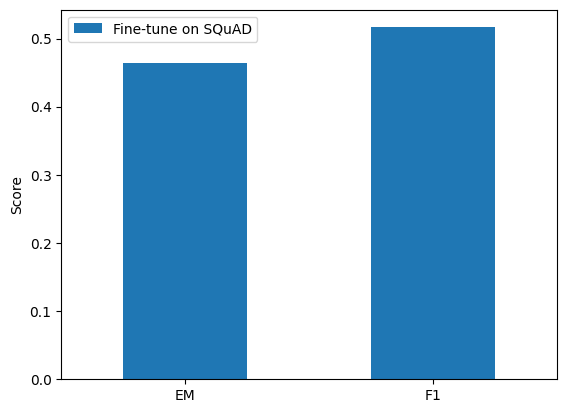

In [60]:
import matplotlib.pyplot  as plt
def plot_reader_eval(reader_eval):
    fig, ax = plt.subplots()
    df = pd.DataFrame.from_dict(reader_eval).reindex(["exact_match", "f1"])
    df.plot(kind="bar", ylabel="Score", rot=0, ax=ax)
    ax.set_xticklabels(["EM", "F1"])
    plt.legend(loc='upper left')
    plt.show()

plot_reader_eval(reader_eval)

#We can see that model did not perfomr that well, why? because we used SQuad Model trained on Wikipedia articles. Custoemr reviews are informal,
#also since its a reveiw , wuestion and answer are subjective and not factual information as stated in Wikipedia

#Finetuning or Adeptaition

In [ ]:
#transfomrers are adept at overfitting  to SQuAD. MOst straight forward way is by fine-tunig our MiniLM model further on SUBjQA trainng set.
#Reader's train() method expects data to be in SQUad json fomrat
#ALl question and answers are grouped together for each item.

In [72]:
dfs['train'].query("title=='B001SER47O'").query("review_id=='f52ae7ca4d3929ca4088582a55f48825'").to_dict(orient = 'list')
#dfs['train'][dfs['train']['review_id']=='f52ae7ca4d3929ca4088582a55f48825']

{'domain': ['electronics', 'electronics', 'electronics'],
 'nn_mod': ['optical', 'tiny', 'tiny'],
 'nn_asp': ['viewfinder', 'camera', 'camera'],
 'query_mod': ['weak', 'compact', 'grainy'],
 'query_asp': ['flash', 'camera', 'video'],
 'q_reviews_id': ['a80d1e8dd6f2e8424db1c05a575b4b02',
  '337458caf84f947b9e4460089621b172',
  '672218b43f2737ac68030dc2233fe32e'],
 'question_subj_level': [1, 1, 1],
 'ques_subj_score': [0.0, 0.0, 0.0],
 'is_ques_subjective': [False, False, False],
 'review_id': ['f52ae7ca4d3929ca4088582a55f48825',
  'f52ae7ca4d3929ca4088582a55f48825',
  'f52ae7ca4d3929ca4088582a55f48825'],
 'id': ['9dcf29548b0a68dc63da0935907f2fd0',
  '6e6f48187d867940e53ff5fbc6200bd1',
  'c543588a442ee68549f7021dbe05c102'],
 'title': ['B001SER47O', 'B001SER47O', 'B001SER47O'],
 'context': ["My daughter ordered this with birthday money after researching cameras online. It was one of the cameras recommended by Ken Rockwell, and one of the few low-end digitals that still has an optical view

In [73]:
def create_paragraphs(df):
    paragraphs = []
    id2context = dict(zip(df["review_id"], df["context"]))
    for review_id, review in id2context.items():
        qas = []
        # Filter for all question-answer pairs about a specific context
        review_df = df.query(f"review_id == '{review_id}'")
        id2question = dict(zip(review_df["id"], review_df["question"]))
        # Build up the qas array
        for qid, question in id2question.items():
            # Filter for a single question ID
            question_df = df.query(f"id == '{qid}'").to_dict(orient="list")
            ans_start_idxs = question_df["answers.answer_start"][0].tolist()
            ans_text = question_df["answers.text"][0].tolist()
            # Fill answerable questions
            if len(ans_start_idxs):
                answers = [
                    {"text": text, "answer_start": answer_start}
                    for text, answer_start in zip(ans_text, ans_start_idxs)]
                is_impossible = False
            else:
                answers = []
                is_impossible = True
            # Add question-answer pairs to qas
            qas.append({"question": question, "id": qid,
                        "is_impossible": is_impossible, "answers": answers})
        # Add context and question-answer pairs to paragraphs
        paragraphs.append({"qas": qas, "context": review})
    return paragraphs

In [75]:
dfs["train"].query("title == 'B00001P4ZH'")

,domain,nn_mod,nn_asp,query_mod,query_asp,q_reviews_id,question_subj_level,ques_subj_score,is_ques_subjective,review_id,id,title,context,question,answers.text,answers.answer_start,answers.answer_subj_level,answers.ans_subj_score,answers.is_ans_subjective
0,electronics,great,bass response,excellent,bass,0514ee34b672623dff659334a25b599b,5,0.5,False,882b1e2745a4779c8f17b3d4406b91c7,2543d296da9766d8d17d040ecc781699,B00001P4ZH,"I have had Koss headphones in the past, Pro 4A...",How is the bass?,[],[],[],[],[]
1,electronics,harsh,high,not strong,bass,7c46670208f7bf5497480fbdbb44561a,1,0.5,False,ce76793f036494eabe07b33a9a67288a,d476830bf9282e2b9033e2bb44bbb995,B00001P4ZH,To anyone who hasn't tried all the various typ...,Is this music song have a goo bass?,"[Bass is weak as expected, Bass is weak as exp...","[1302, 1302]","[1, 1]","[0.5083333, 0.5083333]","[True, True]"
2,electronics,neutral,sound,present,bass,8fbf26792c438aa83178c2d507af5d77,1,0.5,False,d040f2713caa2aff0ce95affb40e12c2,455575557886d6dfeea5aa19577e5de4,B00001P4ZH,I have had many sub-$100 headphones from $5 Pa...,How is the bass?,[The only fault in the sound is the bass],[650],[2],[0.6333333],[True]


In [74]:
product = dfs["train"].query("title == 'B00001P4ZH'")
create_paragraphs(product)

[{'qas': [{'question': 'How is the bass?',
    'id': '2543d296da9766d8d17d040ecc781699',
    'is_impossible': True,
    'answers': []}],
  'context': 'I have had Koss headphones in the past, Pro 4AA and QZ-99.  The Koss Portapro is portable AND has great bass response.  The work great with my Android phone and can be "rolled up" to be carried in my motorcycle jacket or computer bag without getting crunched.  They are very light and do not feel heavy or bear down on your ears even after listening to music with them on all day.  The sound is night and day better than any ear-bud could be and are almost as good as the Pro 4AA.  They are "open air" headphones so you cannot match the bass to the sealed types, but it comes close. For $32, you cannot go wrong.'},
 {'qas': [{'question': 'Is this music song have a goo bass?',
    'id': 'd476830bf9282e2b9033e2bb44bbb995',
    'is_impossible': False,
    'answers': [{'text': 'Bass is weak as expected', 'answer_start': 1302},
     {'text': 'Bass i

In [79]:
#Now we apply this function to each product id in each split


import json
def convert_to_squad(dfs):
    for split, df in dfs.items():
        subjqa_data = {}
        # Create `paragraphs` for each product ID
        groups = (df.groupby("title").apply(create_paragraphs)
            .to_frame(name="paragraphs").reset_index())
        subjqa_data["data"] = groups.to_dict(orient="records")
        # Save the result to disk
        with open(f"electronics-{split}.json", "w+", encoding="utf-8") as f:
            json.dump(subjqa_data, f)

convert_to_squad(dfs)

In [81]:
train_file =  '/content/electronics-train.json'
dev_file = '/content/electronics-validation.json'

In [84]:
reader.train(data_dir = '.',use_gpu =True , n_epochs=1 , batch_size=16 , train_filename = train_file , dev_filename = dev_file)

Preprocessing dataset:   0%|          | 0/3 [00:00<?, ? Dicts/s]WARNING:haystack.modeling.data_handler.processor:Answer 'These earbuds are nothing special. Their best attribute is that they are cheap. The sound from them is nothing special. In comparison to my standard white IPod buds these seem to emphasize the higher frequencies. There seems to be nothing happening in the bass range with these. I don't think they are efficient enough to have much bass at all. To be fair, my IPod buds overly emphasize bass so they are not that accurate either. I also compared these to a pricy Sennheiser set that I've owned for a couple of years and let's just say there is a reason why the Sennheisers cost more.Surely these Panasonic buds are very nice to use if you think they might get damaged somehow in use as it will not break your heart to have to replace them. These might be especially useful if you only listen to talk radio or have high frequency hearing loss. If you really like to listen to the 

In [86]:
reader_eval['fine_tuned_SQuad_SUbjQA'] = evaluate_reader(reader)

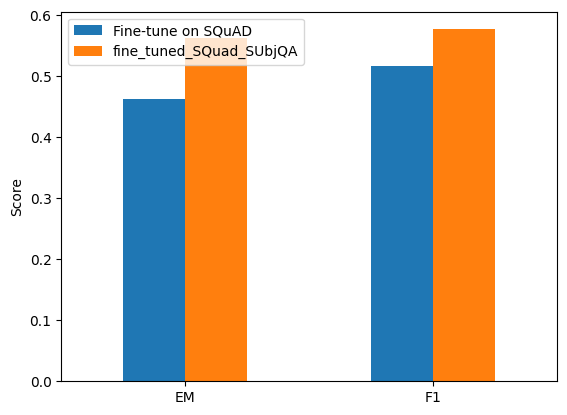

In [87]:
plot_reader_eval(reader_eval)